#[실전예제-미디어] - 유튜브 인기 채널 및 영상 분석

# 인기 채널 순위 시각화 - 환경 설정 (라이브러리, 폰트, 데이터)

##1. 한글 폰트 설치 및 적용

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


##2. 한글 폰트 설치 테스트

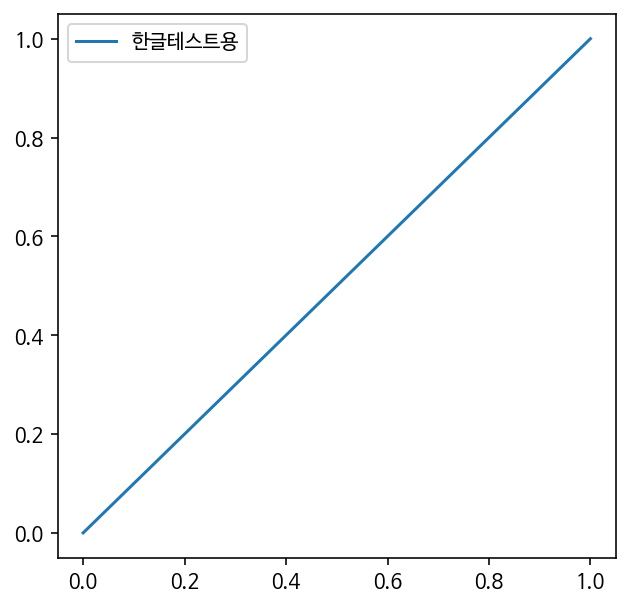

In [0]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

##3. Warning 출력 무시

In [0]:
import warnings
warnings.filterwarnings("ignore")

##4. 라이브러리 import

In [0]:
import pandas as pd
import seaborn as sns

##5. 데이터 가져오기 Drag & Drop

# 인기 채널 순위 시각화 - 데이터 구조 파악 및 정리

## 데이터 불러오기

###1. pandas로 데이터 불러오기 (engine="python", error_bad_lines="false")

In [0]:
KRvideo = pd.read_csv("KRvideos.csv", engine="python", error_bad_lines="false")

## 데이터 구조 파악하기

###1. row, column 수 파악하기

In [0]:
KRvideo.shape

(34567, 16)

###2. 결측 값 확인

In [0]:
KRvideo.isnull().sum()

video_id                     0
trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               3163
dtype: int64

###3. 전체 데이터 구조 파악하기

In [0]:
KRvideo

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34562,pj6YBBrO1sQ,18.14.06,장모님 가게한다고 1억만 달라는 아내 사이다카톡,이슈트래커,24,2018-06-10T23:00:01.000Z,[none],156439,383,58,308,https://i.ytimg.com/vi/pj6YBBrO1sQ/default.jpg,False,False,False,- 남편을 돈줄로만 본 아내- 좋아요와 구독은 언제나 환영입니다.- 카톡시리즈- 모...
34563,_Ne9ER-jr20,18.14.06,여러분~ 렌즈가 이렇게 위험합니다!!!ㅜㅜ _[이슈텔러],이슈텔러 issueTeller,24,2018-06-12T07:00:06.000Z,[none],130948,3121,55,988,https://i.ytimg.com/vi/_Ne9ER-jr20/default.jpg,False,False,False,"안녕하세요~! 이슈텔러 입니다~^^화, 목 오후 4시 / 토요일 오전 9시 재밌고 ..."
34564,xuOQq_fzEjk,18.14.06,2018년 6월 13일 아침 뉴스,News Express,25,2018-06-12T13:17:29.000Z,"한국|""북한""|""미국""|""중국""|""일본""|""러시아""|""한국뉴스""|""뉴스""|""국제뉴스...",62555,319,71,105,https://i.ytimg.com/vi/xuOQq_fzEjk/default.jpg,False,False,False,2018년 6월 13일 아침 뉴스등록되지 않은 구독자가 여기에서 내 새 채널을 지원...
34565,uXvjxeg08eQ,18.14.06,워너원 웃음 참기 영상 워너원 GO X-con.ver,원플,22,2018-06-11T11:57:20.000Z,"워너원|""워너원 고""|""워너원 GO""|""웃음참기""|""워너원 웃음참기""|""워너원 레전...",63306,2369,27,571,https://i.ytimg.com/vi/uXvjxeg08eQ/default.jpg,False,False,False,워너원 웃음 참기 영상 항상 좋아해주셔서 감사합니다8ㅅ8이번에는 얼마전에 있었던 원...


## 데이터 정리하기

###1. 필요한 칼럼만 추리기



In [0]:
df = KRvideo[['title','channel_title','views']]

###2. view 내림차순 정렬 하기

In [0]:
df_sorted = df.sort_values(by='views', ascending=False)
df_sorted

,title,channel_title,views
4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,113876217
4678,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,100911567
4018,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,87450245
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,87430865
3750,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,84281319
...,...,...,...
4806,다니엘 생일 축하해!,여름감기 from OSW,3268
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,jungbub2013,3124
17414,애슐리 18년도 딸기축제 영상❣,ashley wow,2919
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,시때메라 _,2623


###3. 중복 제거 (MAX만 남김)

In [0]:
df_drop_sorted = df_sorted.drop_duplicates(['title','channel_title'],keep="first")

###4. 중복된 row는 몇개였을까?

In [0]:
len(df_sorted) - len(df_drop_sorted)

18138

###5. 중복 제거된 것 확인하기

In [0]:
df_drop_sorted

,title,channel_title,views
4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,113876217
4018,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,87450245
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,87430865
28554,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,73432600
26391,VENOM - Official Trailer (HD),Sony Pictures Entertainment,49185287
...,...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),jungbub2013,3509
4806,다니엘 생일 축하해!,여름감기 from OSW,3268
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,jungbub2013,3124
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,시때메라 _,2623


# 인기 채널 순위 시각화 - seaborn을 활용한 데이터 시각화

##1. 조회수 기준 TOP 100 채널 순위 조회

####채널별 조회수 합계

In [0]:
df_chanel_view_sum = df_drop_sorted.groupby(df['channel_title']).sum()
df_chanel_view_sum

,views
channel_title,
! 세상에 무슨일이,1052789
!t Live,194690
# 정국적으로 뷔가내릴슈가,21698
#Drama Planet,112340
#tae_tae,122499
...,...
힙합 스페이스 (HIPHOP SPACE),482755
힙합 좋아하는여자,833951
힙합 플레이어 _,79585


####정렬

In [0]:
df_chanel_view = df_chanel_view_sum.sort_values(by='views', ascending=False)
df_chanel_view

,views
channel_title,
ibighit,187757328
Marvel Entertainment,174161670
jypentertainment,118541123
YouTube Spotlight,113876217
MLG Highlights,78061767
...,...
메이플스토리2 MSG TV,3954
IfreeMusic,3725
여름감기 from OSW,3268


###TOP 100만 뽑기

In [0]:
df_chanel_view = df_chanel_view[:100]
df_chanel_view

,views
channel_title,
ibighit,187757328
Marvel Entertainment,174161670
jypentertainment,118541123
YouTube Spotlight,113876217
MLG Highlights,78061767
...,...
[Dorothy]도로시,11275375
필름에빠지다,11174308
The Late Show with Stephen Colbert,11157085


###reset_index()

In [0]:
df_chanel_view = df_chanel_view.reset_index()
df_chanel_view

,channel_title,views
0,ibighit,187757328
1,Marvel Entertainment,174161670
2,jypentertainment,118541123
3,YouTube Spotlight,113876217
4,MLG Highlights,78061767
...,...,...
95,[Dorothy]도로시,11275375
96,필름에빠지다,11174308
97,The Late Show with Stephen Colbert,11157085
98,신의한수,10866674


##2. seaborn barplot 사용하여 TOP 100 채널 데이터 시각화

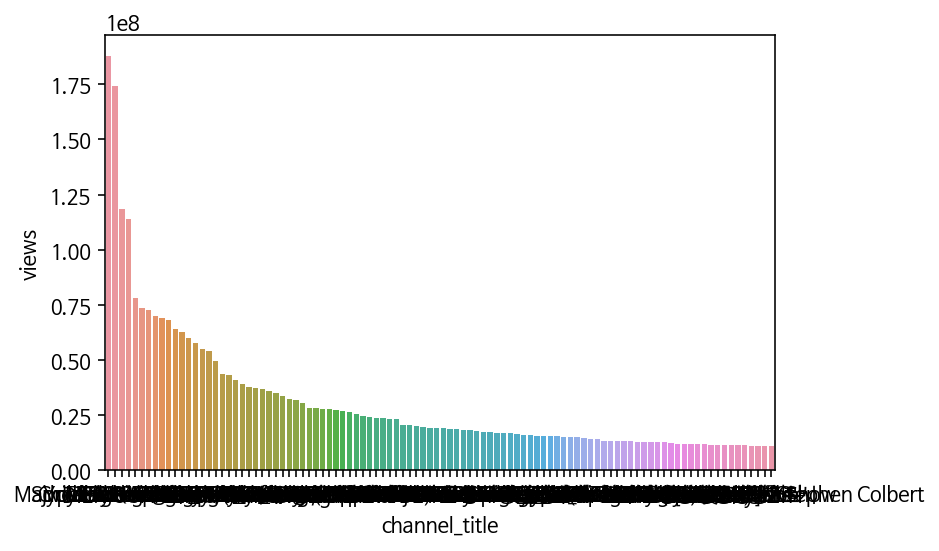

In [0]:
sns.barplot(x='channel_title', y='views', data=df_chanel_view)

##3. 사이즈 (20*100) 및 축 조정

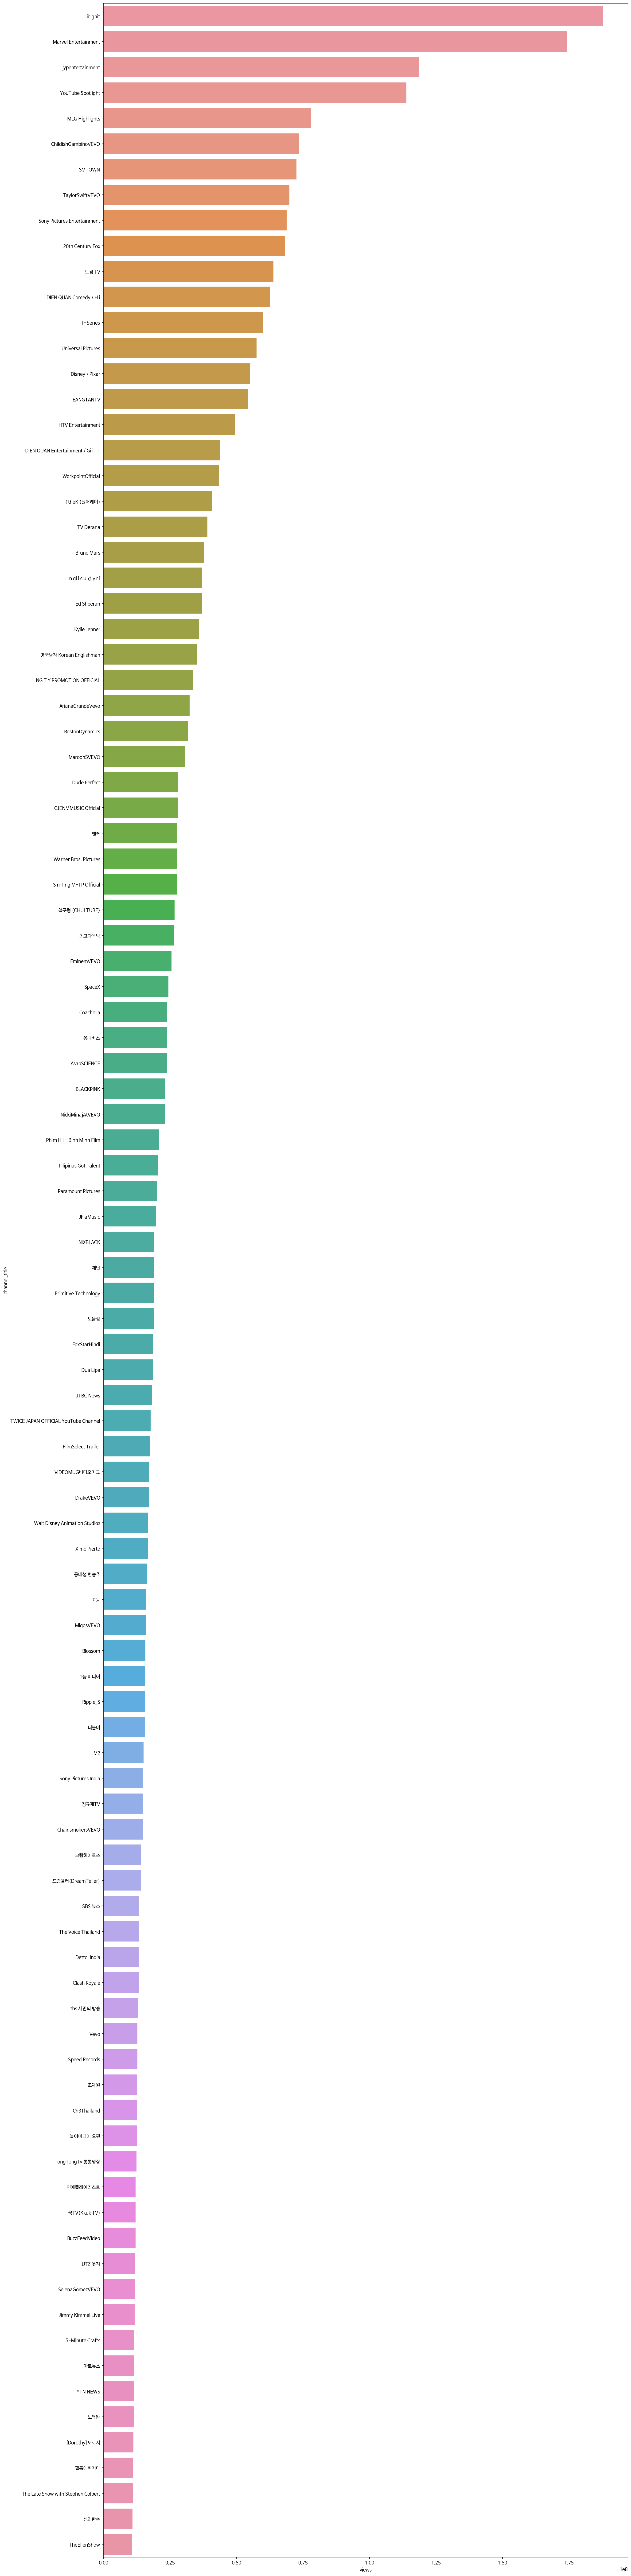

In [0]:
plt.figure(figsize=(20,100))
sns.barplot(x='views', y='channel_title', data=df_chanel_view[:100])

# 인기 영상 키워드 분석하기 - 제목 추출 및 정제하기

###1. 데이터 조회

In [0]:
KRvideo

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,RxGQe4EeEpA,17.14.11,좋아 by 민서_윤종신_좋니 답가,라푸마코리아,22,2017-11-13T07:07:36.000Z,"라푸마|""윤종신""|""좋니""|""좋아""|""샬레""|""민서""",156130,1422,40,272,https://i.ytimg.com/vi/RxGQe4EeEpA/default.jpg,False,False,False,윤종신 '좋니'의 답가 '좋아' 최초 공개!\n그 여자의 이야기를 지금 만나보세요....
1,hH7wVE8OlQ0,17.14.11,JSA 귀순 북한군 총격 부상,Edward,25,2017-11-13T10:59:16.000Z,"JSA|""귀순""|""북한군""|""총격""|""부상""|""JSA 귀순 북한군 총격 부상""",76533,211,28,113,https://i.ytimg.com/vi/hH7wVE8OlQ0/default.jpg,False,False,False,[채널A단독]北 병사 현재 '의식불명'… 혈압 떨어지는 중 \n[채널A단독]우리측 ...
2,9V8bnWUmE9U,17.14.11,나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼),나몰라패밀리 핫쇼,22,2017-11-11T07:16:08.000Z,"아디다스|""빼빼로""|""핫쇼""|""나몰라패밀리""|""대학로""|""공연""",421409,5112,166,459,https://i.ytimg.com/vi/9V8bnWUmE9U/default.jpg,False,False,False,퍼가실때 꼭 출처 부탁드려요
3,0_8py-t5R80,17.14.11,"이명박 출국 현장, 놓치면 안되는 장면",미디어몽구,25,2017-11-12T11:19:52.000Z,"이명박|""이명박 출국금지""|""이명박 출국현장""|""이명박 바레인""|""이명박 대통령""|...",222850,2093,173,1219,https://i.ytimg.com/vi/0_8py-t5R80/default.jpg,False,False,False,다스는 누구겁니까 듣고 난 후 표정
4,bk55RbxiQdI,17.14.11,김장겸은 물러갔다 MBC 노조 환호와 눈물,NocutV,25,2017-11-13T11:08:59.000Z,"nocutV|""노컷V""|""CBS""|""mbc""|""김장겸""|""해임""|""허일후""",84466,1094,109,450,https://i.ytimg.com/vi/bk55RbxiQdI/default.jpg,False,False,False,김장겸 MBC 사장이 결국 해임됐다.\n\nMBC 대주주인 방송문화진흥회는 13일 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34562,pj6YBBrO1sQ,18.14.06,장모님 가게한다고 1억만 달라는 아내 사이다카톡,이슈트래커,24,2018-06-10T23:00:01.000Z,[none],156439,383,58,308,https://i.ytimg.com/vi/pj6YBBrO1sQ/default.jpg,False,False,False,- 남편을 돈줄로만 본 아내- 좋아요와 구독은 언제나 환영입니다.- 카톡시리즈- 모...
34563,_Ne9ER-jr20,18.14.06,여러분~ 렌즈가 이렇게 위험합니다!!!ㅜㅜ _[이슈텔러],이슈텔러 issueTeller,24,2018-06-12T07:00:06.000Z,[none],130948,3121,55,988,https://i.ytimg.com/vi/_Ne9ER-jr20/default.jpg,False,False,False,"안녕하세요~! 이슈텔러 입니다~^^화, 목 오후 4시 / 토요일 오전 9시 재밌고 ..."
34564,xuOQq_fzEjk,18.14.06,2018년 6월 13일 아침 뉴스,News Express,25,2018-06-12T13:17:29.000Z,"한국|""북한""|""미국""|""중국""|""일본""|""러시아""|""한국뉴스""|""뉴스""|""국제뉴스...",62555,319,71,105,https://i.ytimg.com/vi/xuOQq_fzEjk/default.jpg,False,False,False,2018년 6월 13일 아침 뉴스등록되지 않은 구독자가 여기에서 내 새 채널을 지원...
34565,uXvjxeg08eQ,18.14.06,워너원 웃음 참기 영상 워너원 GO X-con.ver,원플,22,2018-06-11T11:57:20.000Z,"워너원|""워너원 고""|""워너원 GO""|""웃음참기""|""워너원 웃음참기""|""워너원 레전...",63306,2369,27,571,https://i.ytimg.com/vi/uXvjxeg08eQ/default.jpg,False,False,False,워너원 웃음 참기 영상 항상 좋아해주셔서 감사합니다8ㅅ8이번에는 얼마전에 있었던 원...


###2. 제목, 뷰만 가져오고 뷰 많은 순으로 정렬 후 중복 제거

In [0]:
df = KRvideo[['title','views']]
df_sorted = df.sort_values(by="views", ascending=False).drop_duplicates(['title'], keep="first")
df_sorted

,title,views
4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,113876217
4018,Marvel Studios' Avengers: Infinity War Officia...,87450245
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865
28554,Childish Gambino - This Is America (Official V...,73432600
26391,VENOM - Official Trailer (HD),49185287
...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509
4806,다니엘 생일 축하해!,3268
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623


In [0]:
df_hot = df_sorted
df_hot

,title,views
4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,113876217
4018,Marvel Studios' Avengers: Infinity War Officia...,87450245
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865
28554,Childish Gambino - This Is America (Official V...,73432600
26391,VENOM - Official Trailer (HD),49185287
...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509
4806,다니엘 생일 축하해!,3268
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623


###3. 제목 Array로 조회

In [0]:
df_hot['title'].values

array(['YouTube Rewind: The Shape of 2017 | #YouTubeRewind',
       "Marvel Studios' Avengers: Infinity War Official Trailer",
       "BTS (방탄소년단) 'FAKE LOVE' Official MV", ...,
       '[홍익인간 인성교육] 7128강 산에 들어가고 싶다',
       '만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그', '소셜 잠금화면 앱 (달고나)'],
      dtype=object)

###4. 정규표현식(re)로 한글 데이터만 남기기 (한글,띄어쓰기 포함)

In [0]:
import re
df_hot['title_refined'] = df_hot['title'].apply(lambda x: re.sub('[^가-힣\s]', '', x))
df_hot

,title,views,title_refined
4856,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,113876217,
4018,Marvel Studios' Avengers: Infinity War Officia...,87450245,
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865,방탄소년단
28554,Childish Gambino - This Is America (Official V...,73432600,
26391,VENOM - Official Trailer (HD),49185287,
...,...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509,홍익인간 인성교육 강 해외여행 증가
4806,다니엘 생일 축하해!,3268,다니엘 생일 축하해
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124,홍익인간 인성교육 강 산에 들어가고 싶다
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623,만취 브이로그서프라이즈 생일 파티실시간 현실 술판여자셋 일상일상브이로그


###5. 공백만 있는 row는 삭제

In [0]:
df_hot = df_hot[df_hot['title_refined'].apply(lambda x: re.sub('[^가-힣]', '', x)) != '']
df_hot

,title,views,title_refined
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865,방탄소년단
2788,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,30583293,방탄소년단
28605,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,22612931,방탄소년단
13442,Red Velvet 레드벨벳 'Bad Boy' MV,19392316,레드벨벳
17879,j-hope 'Daydream (백일몽)' MV,10695328,백일몽
...,...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509,홍익인간 인성교육 강 해외여행 증가
4806,다니엘 생일 축하해!,3268,다니엘 생일 축하해
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124,홍익인간 인성교육 강 산에 들어가고 싶다
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623,만취 브이로그서프라이즈 생일 파티실시간 현실 술판여자셋 일상일상브이로그


# 인기 영상 키워드 분석하기 - 제목 단어 추출 및 빈도 수 구하기

###1. soynlp 설치

In [0]:
pip install soynlp

###2. WordExtractor로 단어 점수 학습

In [0]:
from soynlp.word import WordExtractor

word_extractor = WordExtractor(min_frequency=10,
    min_cohesion_forward=0.05,
    min_right_branching_entropy=0.0
)
word_extractor.train(df_hot['title_refined'].values) # list of str or like
words = word_extractor.extract()
words

training was done. used memory 0.733 Gb
all cohesion probabilities was computed. # words = 4814
all branching entropies was computed # words = 15729
all accessor variety was computed # words = 15729


{'쇼': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=3.0994198487185454, right_branching_entropy=2.9688776460720363, left_accessor_variety=38, right_accessor_variety=35, leftside_frequency=128, rightside_frequency=132),
 '옴': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=0, right_branching_entropy=0, left_accessor_variety=0, right_accessor_variety=0, leftside_frequency=0, rightside_frequency=10),
 '떤': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=0, right_branching_entropy=1.7716239556773663, left_accessor_variety=0, right_accessor_variety=6, leftside_frequency=0, rightside_frequency=29),
 '햄': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=0, right_branching_entropy=0, left_accessor_variety=0, right_accessor_variety=0, leftside_frequency=12, rightside_frequency=0),
 '티': Scores(cohesion_forward=0, cohesion_backward=0, left_branching_entropy=2.234761015956667, right_branching_entropy=2.18

###3. LTokenizer로 L-R 분리

In [0]:
from soynlp.tokenizer import LTokenizer
cohesion_score = {word:score.cohesion_forward for word, score in words.items()}
tokenizer = LTokenizer(scores=cohesion_score)

###4. 제목 데이터 중 L만 남기기

In [0]:
df_hot['tokenized'] = df_hot['title_refined'].apply(lambda x: tokenizer.tokenize(x, remove_r=True))
df_hot

,title,views,title_refined,tokenized
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865,방탄소년단,[방탄소년단]
2788,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,30583293,방탄소년단,[방탄소년단]
28605,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,22612931,방탄소년단,[방탄소년단]
13442,Red Velvet 레드벨벳 'Bad Boy' MV,19392316,레드벨벳,[레드벨벳]
17879,j-hope 'Daydream (백일몽)' MV,10695328,백일몽,[백일몽]
...,...,...,...,...
13423,[홍익인간 인성교육] 7020강 해외여행 증가 (1_4),3509,홍익인간 인성교육 강 해외여행 증가,"[홍익인간, 인성교육, 강, 해외, 증가]"
4806,다니엘 생일 축하해!,3268,다니엘 생일 축하해,"[다니엘, 생일, 축하]"
18568,[홍익인간 인성교육] 7128강 산에 들어가고 싶다,3124,홍익인간 인성교육 강 산에 들어가고 싶다,"[홍익인간, 인성교육, 강, 산에, 들어, 싶다]"
509,만취 브이로그ㅣ서프라이즈 생일 파티ㅣ실시간 현실 술판ㅣ여자셋 일상ㅣ일상브이로그,2623,만취 브이로그서프라이즈 생일 파티실시간 현실 술판여자셋 일상일상브이로그,"[만취, 브이로그, 생일, 파티, 현실, 술판여자셋, 일상]"


# 인기 영상 키워드 분석하기 - 단어 빈도 수 구하기

###1. 인기 영상 (50만 조회수 이상)

In [0]:
df_hot_top = df_hot[df_sorted['views'] > 500000]
df_hot_top

,title,views,title_refined,tokenized
30844,BTS (방탄소년단) 'FAKE LOVE' Official MV,87430865,방탄소년단,[방탄소년단]
2788,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,30583293,방탄소년단,[방탄소년단]
28605,BTS (방탄소년단) LOVE YOURSELF 轉 Tear 'Singularity'...,22612931,방탄소년단,[방탄소년단]
13442,Red Velvet 레드벨벳 'Bad Boy' MV,19392316,레드벨벳,[레드벨벳]
17879,j-hope 'Daydream (백일몽)' MV,10695328,백일몽,[백일몽]
...,...,...,...,...
32727,"중딩 커플의 키스, 친구들한텐 비밀인 이유 [진짜사랑 리턴즈2 11-1]",502090,중딩 커플의 키스 친구들한텐 비밀인 이유 진짜사랑 리턴즈,"[중딩, 커플, 키스, 친구, 비밀, 이유, 진짜, 리턴즈]"
3876,"문 대통령, JSA 장병 초청... '명예 소령' 이국종 교수도 참석/비디오머그",501508,문 대통령 장병 초청 명예 소령 이국종 교수도 참석비디오머그,"[문, 대통령, 장병, 초청, 명예, 소령, 이국종, 교수, 참석]"
11219,윤식당2 방문한 우크라이나 블로거가 공개하는 비하인드 및 인터뷰,501469,윤식당 방문한 우크라이나 블로거가 공개하는 비하인드 및 인터뷰,"[윤식당, 방문, 우크라이나, 블로거가, 공개, 비하인드, 및, 인터뷰]"
20576,"♥좋아싫어해♥(スキキライ) 태쁘 & 엔찬 커플송! (커버송, Cover) [Pre...",500972,좋아싫어해 태쁘 엔찬 커플송 커버송 쁘띠허브,"[좋아, 태쁘, 엔찬, 커플, 커버, 쁘띠허브]"


###2. tokenized 단어 한 배열에 담기

In [0]:
words = []
for i in df_hot_top['tokenized'].values:
  for k in i:
    words.append(k)
words

['방탄소년단',
 '방탄소년단',
 '방탄소년단',
 '레드벨벳',
 '백일몽',
 '방탄소년단',
 '방탄소년단',
 '여자친구',
 '밤',
 '방탄소년단',
 '레드벨벳',
 '피카부',
 '방탄소년단',
 '방탄소년단',
 '워너원',
 '약속',
 '선미',
 '주인공',
 '워너원',
 '부메랑',
 '엑소',
 '종현',
 '빈소',
 '방탄소년단',
 '등',
 '애도',
 '이어져',
 '샤이니',
 '종현',
 '빛이',
 '나',
 '워너원',
 '켜줘',
 '종현',
 '발인',
 '음악에',
 '열정',
 '넘쳤던',
 '가수',
 '영면동료들',
 '마지막',
 '길',
 '눈물',
 '배웅',
 '샤이니',
 '빙글뱅글',
 '워너원',
 '사랑을',
 '했다',
 '샤이니',
 '데리',
 '가',
 '텔레콤',
 '연아와',
 '성빈이의',
 '이야기',
 '현아',
 '방예담',
 '프리',
 '배틀',
 '시간',
 '능력',
 '가진',
 '남자',
 '여성에게',
 '한',
 '행동',
 '방탄소년단',
 '샤이니',
 '종현',
 '빈소',
 '찾은',
 '소녀시대',
 '써니',
 '멈추',
 '않는',
 '눈물',
 '동영상',
 '단독',
 '조현민',
 '에이',
 '폭언',
 '음성',
 '공개',
 '방탄소년단',
 '방탄',
 '꽃',
 '길',
 '직캠',
 '트와이스',
 '직캠',
 '김정은',
 '웃게',
 '한',
 '제주',
 '오연준의',
 '바람',
 '불어오는',
 '곳비디오머그',
 '내',
 '여자친구',
 '개',
 '쩌는듯',
 '엔시티',
 '드림',
 '아내',
 '낯선사람',
 '차에',
 '태우면',
 '안되는',
 '이유',
 '레드벨벳',
 '피카부',
 '방탄소년단',
 '여자',
 '시청자',
 '빵터',
 '선수들',
 '대화',
 '이엑스아이디',
 '내일',
 '뮤직',
 '비디오',
 '가요대축제',
 '방탄소년단',
 '병맛더빙',
 '급식',
 '콜롬비아나',

### Counter로 words 빈도 수 파악하기

In [0]:
from collections import Counter
count = Counter(words)
words_dict = dict(count)
print(words_dict)

{'방탄소년단': 50, '레드벨벳': 17, '백일몽': 1, '여자친구': 17, '밤': 4, '피카부': 5, '워너원': 10, '약속': 3, '선미': 3, '주인공': 2, '부메랑': 1, '엑소': 2, '종현': 36, '빈소': 10, '등': 5, '애도': 1, '이어져': 1, '샤이니': 22, '빛이': 1, '나': 2, '켜줘': 1, '발인': 5, '음악에': 1, '열정': 1, '넘쳤던': 1, '가수': 2, '영면동료들': 1, '마지막': 14, '길': 3, '눈물': 21, '배웅': 3, '빙글뱅글': 2, '사랑을': 5, '했다': 7, '데리': 3, '가': 3, '텔레콤': 1, '연아와': 1, '성빈이의': 1, '이야기': 13, '현아': 1, '방예담': 2, '프리': 2, '배틀': 3, '시간': 11, '능력': 2, '가진': 2, '남자': 18, '여성에게': 1, '한': 17, '행동': 3, '찾은': 2, '소녀시대': 5, '써니': 1, '멈추': 2, '않는': 2, '동영상': 3, '단독': 3, '조현민': 4, '에이': 3, '폭언': 1, '음성': 4, '공개': 15, '방탄': 4, '꽃': 4, '직캠': 21, '트와이스': 11, '김정은': 15, '웃게': 1, '제주': 5, '오연준의': 1, '바람': 4, '불어오는': 3, '곳비디오머그': 1, '내': 7, '개': 7, '쩌는듯': 1, '엔시티': 3, '드림': 1, '아내': 10, '낯선사람': 1, '차에': 1, '태우면': 1, '안되는': 9, '이유': 51, '여자': 31, '시청자': 3, '빵터': 4, '선수들': 5, '대화': 1, '이엑스아이디': 1, '내일': 3, '뮤직': 2, '비디오': 1, '가요대축제': 2, '병맛더빙': 5, '급식': 3, '콜롬비아나': 1, '김성태': 9, '빡친': 4, '손석희': 4, '결국': 6, '

# 인기 영상 키워드 분석하기 - 워드 클라우드 그리기

### wordcloud 폰트 설정 및 생성하기

In [0]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', background_color='white', width=500, height=500).generate_from_frequencies(words_dict)

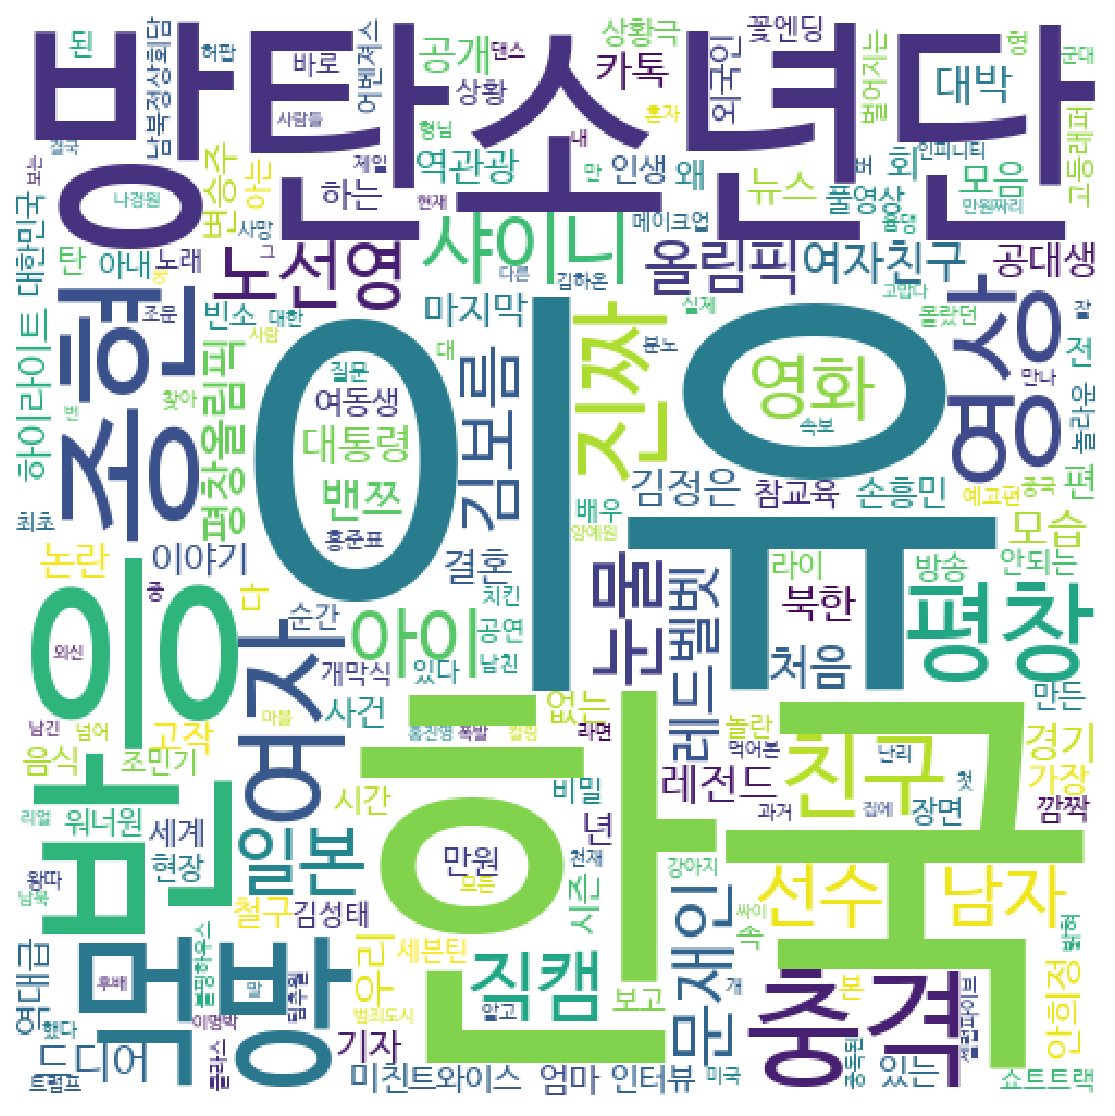

In [0]:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### StopWord 설정 후 다시 보기

In [0]:
stopwords = {'수','한','일','온','화'}
for word in stopwords:
  words_dict.pop(word)